### Test: initial distribution of actin filaments

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from numba import njit

In [41]:
fpath = "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/checks/eq"
simnames = [
    "f1",
    "f1_5",
    "f2",
    "f2_5",
    "f5",
    "f10",
]
simlabels = [
    "Filamin = 1.0",
    "Filamin = 1.5",
    "Filamin = 2.0",
    "Filamin = 2.5",
    "Filamin = 5.0",
    "Filamin = 10.0",
]
fconc = [1,1.5,2,2.5,5,10]
simpaths_actin = [os.path.join(fpath, ii, "result/result0-399/SylinderAscii_20.dat") for ii in simnames]
simpaths_xlinks = [os.path.join(fpath, ii, "result/result0-399/ProteinAscii_20.dat") for ii in simnames]

In [23]:
# Filament class
class Filament():
    def __init__(self, pos0, pos1, radius,gid):
        self.radius = radius
        self.pos0 = pos0
        self.pos1 = pos1
        self.gid = gid
    def GetCenter(self,boxsize):
        return getMean(self.pos0, self.pos1,boxsize)
    def GetLength(self,boxsize):
        xi = getDistance(self.pos1,self.pos0,boxsize)
        return np.linalg.norm( xi)
    def GetOrientation(self):
        xi = self.pos1 - self.pos0
        return xi/np.sqrt(xi.dot(xi))

    def Plot3(self,ax, col="red"):
        ax.plot3D( [self.pos0[0], self.pos1[0]], [self.pos0[1], self.pos1[1]], [self.pos0[2], self.pos1[2]], col)
    def GetStringtoWrite(self):
        return 'C {0} {1} {2:0.6f} {3:0.6f} {4:0.6f} {5:0.6f} {6:0.6f} {7:0.6f}\n'.format(
        self.gid, self.radius,
        self.pos0[0], self.pos0[1], self.pos0[2],
        self.pos1[0], self.pos1[1], self.pos1[2])
    def __repr__(self):
        return "Filament()"
    def __str__(self):
        return 'Filament {0}:\n  pos0: {1}\n  pos1: {2}\n  radius: {3}'.format(self.gid, self.pos0, self.pos1,self.radius)

# Protein class
class Protein():
    def __init__(self, pos0, pos1, link0, link1, gid):
        self.pos0 = pos0
        self.pos1 = pos1
        self.link0 = link0
        self.link1 = link1
        self.gid = gid
    def GetCenter(self,boxsize):
        return getMean(self.pos0, self.pos1,boxsize)
    def GetLength(self,boxsize):
        xi = getDistance(self.pos1,self.pos0,boxsize)
        return np.linalg.norm( xi)
    def GetOrientation(self):
        if link0 != -1 and link1 != -1:
            xi = self.pos1 - self.pos0
            return xi/np.sqrt( xi.dot(xi))
        else:
            return None

    def Plot3(self,ax,col="blue"):
        ax.plot3D( [self.pos0[0], self.pos1[0]], [self.pos0[1], self.pos1[1]], [self.pos0[2], self.pos1[2]], col)
    def GetStringtoWrite(self):
        return 'P {0} 0 {2:0.6f} {3:0.6f} {4:0.6f} {5:0.6f} {6:0.6f} {7:0.6f} {8} {9} \n'.format(
        self.gid, self.radius,
        self.pos0[0], self.pos0[1], self.pos0[2],
        self.pos1[0], self.pos1[1], self.pos1[2],
        self.link0, self.link1)
    def __repr__(self):
        return "Protein()"
    def __str__(self):
        return 'Protein {0}:\n  pos0: {1}\n  pos1: {2}\n  Links: {3}--{4}'.format(self.gid, self.pos0, self.pos1, self.link0, self.link1)

    
def load_filaments( fpath):
    
    flist = []
    with open(fpath, 'r') as file1:
        filecontent = file1.readlines()
        for line in filecontent:
            if line.startswith('C'):
                data = line.split()
                gid = int(data[1])
                radius = float(data[2])
                pos0 = np.array([float(data[3]), float(data[4]), float(data[5])])
                pos1 = np.array([float(data[6]), float(data[7]), float(data[8])])
                flist.append( Filament(pos0, pos1, radius,gid))
    return flist

def load_proteins( fpath):
    
    plist = []
    with open(fpath, 'r') as file2:
        filecontent = file2.readlines()
        for line in filecontent:
            if line.startswith('P'):
                data = line.split()
                gid = int(data[1])
                pos0 = np.array([float(data[3]), float(data[4]), float(data[5])])
                pos1 = np.array([float(data[6]), float(data[7]), float(data[8])])
                link0 = int(data[9])
                link1 = int(data[10])
                plist.append( Protein(pos0, pos1, link0, link1, gid))
    return plist

NameError: name 'simpaths' is not defined

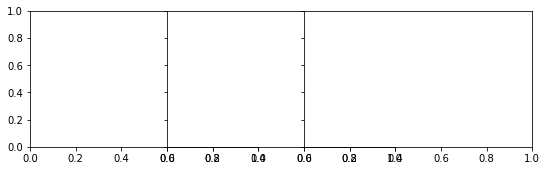

In [24]:
# Plot all xyz coordinates of filament centers
fig, axs = plt.subplots( 1,3, figsize=(9,2.5), sharey=True)
plt.subplots_adjust(wspace=-0.4)

flist = load_filaments(simpaths[0])
nF = len(flist)

# filament centers
c = np.zeros( (nF,3))
for jf in range(nF):
    c[jf,:] = (flist[jf].pos0 + flist[jf].pos1)/2
    
axs[0].plot(c[:,0], c[:,1], 'bo', markersize=0.1)
axs[1].plot(c[:,0], c[:,2], 'ro', markersize=0.1)
axs[2].plot(c[:,1], c[:,2], 'go', markersize=0.1)
    
for ax in axs.flatten():
    ax.set(xlim=[0.4,1.6],ylim=[0.4,1.6])
    ax.set_aspect('equal', 'box')

cols = ['XY','XZ','YZ']
for ax, col in zip(axs, cols):
    ax.set_title(col)

# fig.savefig('/Users/saadjansari/Desktop/tactoid_actin_initial_dist.jpg', dpi=150, bbox_inches='tight')

In [20]:
def getCC( ftlist, ptlist):

    # Create a graph for filaments
    g = nx.Graph()
    g.add_nodes_from( np.arange( len(ftlist)).tolist() )

    # add edges to the graph (each edge represents a binding xlink)
    for p in ptlist:
        if p.link0 != -1 and p.link1 != -1:
            g.add_edge(p.link0, p.link1)

    # find connected component largest
    cc = list( max(nx.connected_components(g), key=len) )
    #cct2[[it for i in range(len(cc))], cc] = True

    return cc

In [42]:
# Find clusters
for idx in range(len(simpaths_actin)):
    flist = load_filaments( simpaths_actin[idx])
    plist = load_proteins(simpaths_xlinks[idx])
    nP = len(plist)
    nF = len(flist)

    cc = getCC(flist,plist)
    print(len(cc))

2729
5266
5846
6015
6386
6400


In [107]:
# nematic order
def NematicTensor( PList):
    QList = np.array([np.outer(p, p) for p in PList])
    #polarOrder = np.mean(PList, axis=0)
    nematicOrder = np.mean(QList, axis=0) - np.identity(3)/3
    return nematicOrder

def NematicOrder( fils):
    Q,_ = NematicTensor(fils)
    return Q

In [108]:
@njit
def NematicOrder2( PList):
    QList = np.zeros((orientList.shape[0],3,3))
    Q = np.zeros((3,3))
    for irow in np.arange(orientList.shape[0]):
        Q = Q + np.outer( orientList[irow,:], orientList[irow,:])
    Q = Q/orientList.shape[0] - np.identity(3)/3
    return Q

In [109]:
orientList = np.zeros( (len(flist),3))
for ifil in range(len(flist)):
    orientList[ifil,:] = flist[ifil].GetOrientation()
%timeit NematicTensor(orientList)
%timeit NematicOrder2(orientList)

30.5 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.76 ms ± 74.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [111]:
NematicOrder2(orientList)

array([[-0.33333333,  0.        ,  0.        ],
       [ 0.        , -0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.66666667]])

In [92]:
QList = np.array([np.outer(p, p) for p in orientList])

In [96]:
QList[0,:,:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [10]:
cc

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
